# CO2 Profiles 


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
import netCDF4 as cdf
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar
from math import sqrt
import pickle
from __future__ import division

In [3]:
##################################### Dataset Definition: Run1 - SiBCASA-GFED4 ###############################################

# co2_rbo_aircraft-pfp_26_representative.nc - Rio Branco
# co2_tab_aircraft-pfp_26_representative.nc - Tabatinga
# co2_san_aircraft-pfp_26_representative.nc - Santarem
# co2_alf_aircraft-pfp_26_representative.nc - Alta Floresta
# co2_mlo_surface-flask_1_representative.nc - Mauna Loa

directories = ['/Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/', 
              '/Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/' 
              ]




In [4]:
# Root mean square function

def rmse(simulations, observations):
    simulations = np.array(simulations)
    observations = np.array(observations)
    differences = simulations - observations                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    differences_squared = differences_squared[numpy.logical_not(numpy.isnan(differences_squared))]
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val


In [5]:
### Overview of how many obs were done in each 500 m interval from 0-4500 m
### change site 'tab' etc one the name of the co2 file

#f_ex = cdf.Dataset('/Storage/CO2/botia/run6_sibcasa_gfed4_optimized/analysis/data_molefractions/co2_rbo_aircraft-pfp_26_representative.nc')
f_ex = cdf.Dataset('/Users/botia/mnt/promise/CO2/botia/run7_sibcasa_gfed4_optimized_fsam/analysis/data_molefractions/co2_rbo_aircraft-pfp_26_representative.nc')

alts = f_ex.variables['altitude'][:]
obses = f_ex.variables['value'][:]*1e6               
simus = f_ex.variables['modelsamplesensemble'][:]*1e6
times = f_ex.variables['time_components'][:]

index = np.where(alts<4500)

altura = alts[index] # type numpy array
observs = obses[index]
simulas = simus.sum(axis=1)[index]
alt_sel = set(altura) # type = set 
alt_sel = sorted(alt_sel) # type= list
avg = []
avg_sim = []
obs_bin = []


for h in range(len(alt_sel)):
    obs_same_height = []
    sim_same_height = []
    for i in range(len(altura)):
        if alt_sel[h] == altura[i]:
            obs_same_height.append(observs[i])
            sim_same_height.append(simulas[i])
            
    obs_bin.append(len(obs_same_height))
        #print alt_sel[h], obs_bin

    if alt_sel[h] < 500:
        obs_500 = sum(obs_bin)

    if 500 < alt_sel[h] < 1000:
        obs_1000 = sum(obs_bin)-obs_500

    if 1000 < alt_sel[h] < 1500:
        obs_1500 = sum(obs_bin)-obs_500-obs_1000

    if 1500 < alt_sel[h] < 2000:
        obs_2000 = sum(obs_bin)-obs_500-obs_1000-obs_1500

    if 2000 < alt_sel[h] < 2500:
        obs_2500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000

    if 2500 < alt_sel[h] < 3000:
        obs_3000 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500

    if 3000 < alt_sel[h] < 3500:
        obs_3500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000

    if 3500 < alt_sel[h] < 4000:
        obs_4000 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000-obs_3500

    if 4000 < alt_sel[h] < 4500:
        obs_4500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000-obs_3500-obs_4000

print obs_500,obs_1000,obs_1500,obs_2000,obs_2500,obs_3000,obs_3500,obs_4000,obs_4500

74 158 87 169 85 83 89 159 85


# Observation Analysis 
- Plotting all seasons on one graph: all year, wet and fire season observations

co2_rbo_aircraft-pfp_26_representative.nc
2010 [19, 36, 20, 40, 21, 19, 20, 36, 20] [11, 21, 11, 22, 13, 11, 11, 20, 11] [8, 15, 9, 18, 8, 8, 9, 16, 9]
2011 [16, 27, 18, 35, 16, 14, 18, 34, 18] [9, 16, 10, 19, 9, 8, 10, 18, 10] [7, 11, 8, 16, 7, 6, 8, 16, 8]
2012 [15, 43, 22, 44, 18, 21, 21, 44, 21] [9, 26, 13, 26, 11, 13, 13, 26, 12] [6, 17, 9, 18, 7, 8, 8, 18, 9]
2013 [11, 30, 14, 31, 16, 15, 17, 30, 13] [7, 20, 10, 22, 10, 11, 11, 21, 9] [4, 10, 4, 9, 6, 4, 6, 9, 4]
2014 [12, 20, 12, 17, 12, 13, 12, 14, 12] [12, 20, 12, 17, 12, 13, 12, 14, 12] [0, 0, 0, 0, 0, 0, 0, 0, 0]


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


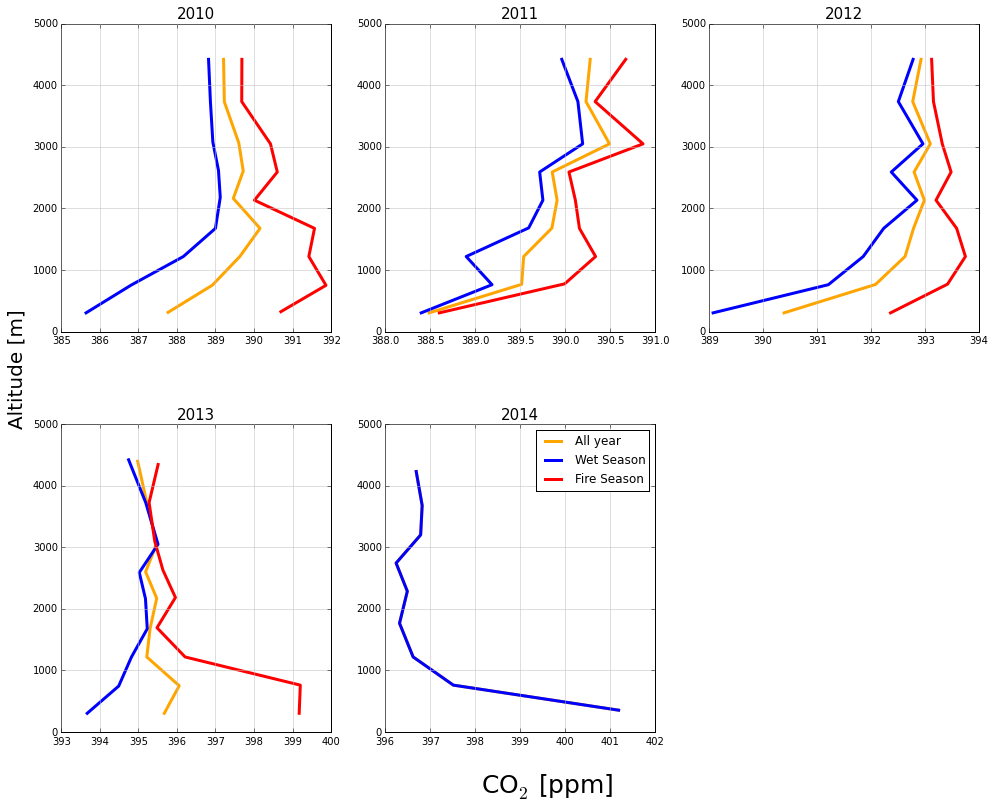

In [6]:
#site = 'mlo_surface-flask_1'
site = 'rbo'

minyear = 2010
maxyear = 2015

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO$_2$ [ppm]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

#dirbf = '/Storage/CO2/botia/run7_sibcasa_gfed4_optimized_fsam/analysis/data_molefractions/'
dirbf = '/Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/'

for fname in os.listdir(dirbf):
    if fname[4:7] == site:
        print fname
        f_site = cdf.Dataset(dirbf+fname)
        o = f_site.variables['value'][:]*1e6               
        s = f_site.variables['modelsamplesensemble'][:]*1e6
        a = f_site.variables['altitude'][:]
        time = f_site.variables['time_components'][:]
        dates = []
        for i in time:
            dates.append(dt.datetime(*i))
        dates = np.array(dates)
        
        dict_obs_all  = {}
        dict_obs_wet  = {}
        dict_obs_fire = {}
        
        for y in range(minyear,maxyear):
                
            # To look at individual years
            date_min = dt.datetime(y,1,1)
            date_max = dt.datetime(y+1,1,1)
                
            # wet season
            date_min_wet = dt.datetime(y,1,1)
            date_max_wet = dt.datetime(y,8,1)
                
            # fire season
            date_min_fire = dt.datetime(y,8,1)
            date_max_fire = dt.datetime(y+1,1,1)
                
            d_index_all  = np.where(np.logical_and(dates >= date_min, dates < date_max))
            d_index_fire = np.where(np.logical_and(dates >= date_min_fire, dates < date_max_fire))
            d_index_wet  = np.where(np.logical_and(dates >= date_min_wet, dates < date_max_wet))
        
            obs = o[d_index_all]
            sim = s.sum(axis=1)[d_index_all]
            alt = a[d_index_all]
                
            # wet season obs and sims
            obs_wet = o[d_index_wet]
            sim_wet = s.sum(axis=1)[d_index_wet]
            alt_wet = a[d_index_wet]
                
            # fire season obs and sims
            obs_fire = o[d_index_fire]
            sim_fire = s.sum(axis=1)[d_index_fire]
            alt_fire = a[d_index_fire]
                
            index_500 = np.where(alt<500)
            index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
            index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
            index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
            index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
            index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
            index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
            index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
            index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
            index_500_wet = np.where(alt_wet<500)
            index_1000_wet = np.where(np.logical_and(alt_wet>=500,alt_wet<1000))
            index_1500_wet = np.where(np.logical_and(alt_wet>=1000,alt_wet<1500))
            index_2000_wet = np.where(np.logical_and(alt_wet>=1500,alt_wet<2000))
            index_2500_wet = np.where(np.logical_and(alt_wet>=2000,alt_wet<2500))
            index_3000_wet = np.where(np.logical_and(alt_wet>=2500,alt_wet<3000))
            index_3500_wet = np.where(np.logical_and(alt_wet>=3000,alt_wet<3500))
            index_4000_wet = np.where(np.logical_and(alt_wet>=3500,alt_wet<4000))
            index_4500_wet = np.where(np.logical_and(alt_wet>=4000,alt_wet<4500))
            
            index_500_fire = np.where(alt_fire<500)
            index_1000_fire = np.where(np.logical_and(alt_fire>=500,alt_fire<1000))
            index_1500_fire = np.where(np.logical_and(alt_fire>=1000,alt_fire<1500))
            index_2000_fire = np.where(np.logical_and(alt_fire>=1500,alt_fire<2000))
            index_2500_fire = np.where(np.logical_and(alt_fire>=2000,alt_fire<2500))
            index_3000_fire = np.where(np.logical_and(alt_fire>=2500,alt_fire<3000))
            index_3500_fire = np.where(np.logical_and(alt_fire>=3000,alt_fire<3500))
            index_4000_fire = np.where(np.logical_and(alt_fire>=3500,alt_fire<4000))
            index_4500_fire = np.where(np.logical_and(alt_fire>=4000,alt_fire<4500))
            
            indices      = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                            index_3500,index_4000,index_4500]   
                
            indices_wet  = [index_500_wet,index_1000_wet,index_1500_wet,index_2000_wet,index_2500_wet,index_3000_wet,
                            index_3500_wet,index_4000_wet,index_4500_wet]
                
            indices_fire = [index_500_fire,index_1000_fire,index_1500_fire,index_2000_fire,index_2500_fire,index_3000_fire,
                            index_3500_fire,index_4000_fire,index_4500_fire]
                
                        
            obs_bin      = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                            len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                            len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
    
            obs_bin_wet  = [len(obs_wet[index_500_wet]), len(obs_wet[index_1000_wet]),  len(obs_wet[index_1500_wet]), 
                            len(obs_wet[index_2000_wet]), len(obs_wet[index_2500_wet]), len(obs_wet[index_3000_wet]),
                            len(obs_wet[index_3500_wet]), len(obs_wet[index_4000_wet]), len(obs_wet[index_4500_wet])]
    
            obs_bin_fire = [len(obs_fire[index_500_fire]), len(obs_fire[index_1000_fire]),  len(obs_fire[index_1500_fire]), 
                            len(obs_fire[index_2000_fire]), len(obs_fire[index_2500_fire]), len(obs_fire[index_3000_fire]),
                            len(obs_fire[index_3500_fire]), len(obs_fire[index_4000_fire]), len(obs_fire[index_4500_fire])]

            # activate to see the number of observations in each height per year
            dict_obs_all['%i'%(y)]  = obs_bin
            dict_obs_wet['%i'%(y)]  = obs_bin_wet
            dict_obs_fire['%i'%(y)] = obs_bin_fire
            
            print y, obs_bin, obs_bin_wet, obs_bin_fire

            observations = [] 
            obs_fire_alt = []
            obs_wet_alt  = []
                
            altitude     = []
            alt_fire_alt = []
            alt_wet_alt  = []
                
            for x in range(len(indices)):
                observations.append((obs[indices[x]]).mean())
                obs_fire_alt.append((obs_fire[indices_fire[x]]).mean())
                obs_wet_alt.append((obs_wet[indices_wet[x]]).mean())
                
                altitude.append((alt[indices[x]]).mean())
                alt_fire_alt.append((alt_fire[indices_fire[x]]).mean())
                alt_wet_alt.append((alt_wet[indices_wet[x]]).mean())
      
            labels = ['All year', 'Wet Season', 'Fire Season']
            
            if y == 2010: 
                ax1 = plt.subplot(231)
                ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
                ax1.plot(obs_wet_alt, alt_wet_alt, color = 'blue',label=labels[1],linewidth = 3)
                ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
                #ax1.legend(loc = 'upper right')
                #plt.xlim(387, 392)
            if y == 2011: 
                ax1 = plt.subplot(232)
                ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
                ax1.plot(obs_wet_alt, alt_wet_alt, color = 'blue',label=labels[1],linewidth = 3)
                ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
                #plt.xlim(388, 393)
            if y == 2012: 
                ax1 = plt.subplot(233)
                ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
                ax1.plot(obs_wet_alt, alt_wet_alt, color = 'blue',label=labels[1],linewidth = 3)
                ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
                #ax1.legend(loc = 'upper right')
                #plt.xlim(391, 396)
            if y == 2013: 
                ax1 = plt.subplot(234)
                ax1.plot(observations, altitude, color = 'orange',linewidth = 3)
                ax1.plot(obs_wet_alt, alt_wet_alt,color = 'blue',linewidth = 3)
                ax1.plot(obs_fire_alt, alt_fire_alt,color = 'red',linewidth = 3)
                #plt.xlim(392, 397)
            if y == 2014:
                ax1 = plt.subplot(235)
                ax1.plot(observations, altitude, color = 'orange', label=labels[0],linewidth = 3)
                ax1.plot(obs_wet_alt, alt_wet_alt, color = 'blue',label=labels[1],linewidth = 3)
                ax1.plot(obs_fire_alt, alt_fire_alt, color = 'red',label=labels[2],linewidth = 3)
                ax1.legend(loc = 'upper right')
                #plt.xlim(395, 400)
                
                
            #ax1.set_title('%s %i - CO$_2$ Profile'%(site,y),fontsize=15)
            ax1.set_title('%i'%(y),fontsize=15)
            ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
            ax1.set_ylim(0,5000)
            ax1 = plt.subplot(236)
                    
        t1 = [0]*9
        t2 = [0]*9
        ax1 = plt.subplot(236)
        ax1.plot(t1,t2,'-')
        ax1.legend(bbox_to_anchor=(0.7, 0.7)) 
        ax1.legend(bbox_to_anchor=(2, 0.7))
        ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
        ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
        ax1.spines['right'].set_color('none')
        ax1.spines['left'].set_color('none')
        ax1.spines['bottom'].set_color('none')
        ax1.spines['top'].set_color('none')
        fig.savefig('ObsSanperYear2010-2014.png',bbox_inches='tight',DPI=1000)

In [7]:
def sizes_gen(site,season):
    '''Function that returns the sizes of the markers to plot for each height, at each site and for each season'''    
    maxs        = [ ]
    mins        = [ ]
    sizes_2010  = [ ]
    sizes_2011  = [ ]
    sizes_2012  = [ ]
    sizes_2013  = [ ]
    sizes_2014  = [ ]
    obs_all_yrs = [ ]

    minyear = 2010
    maxyear = 2015

    if site == 'san':
        obs_all  = pickle.load( open( "san_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "san_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "san_obs_wet.pickle", "rb" ) )
    if site == 'rbo':
        obs_all  = pickle.load( open( "rbo_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "rbo_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "rbo_obs_wet.pickle", "rb" ) )
    if site == 'alf':
        obs_all  = pickle.load( open( "alf_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "alf_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "alf_obs_wet.pickle", "rb" ) )   
    if site == 'tab':
        obs_all  = pickle.load( open( "tab_obs_all.pickle", "rb" ) )
        obs_fire = pickle.load( open( "tab_obs_fire.pickle", "rb" ) )
        obs_wet  = pickle.load( open( "tab_obs_wet.pickle", "rb" ) )

    if season == 'fire':
        maxyear = 2014
        for y in range(minyear,maxyear):
            maxs.append(max(obs_fire['%i'%(y)]))
            mins.append(min(obs_fire['%i'%(y)]))
            ran = range(min(mins),max(maxs)+1)
        cont = 0
        for year in range(minyear,maxyear):
            for i in range(9):
                elem = obs_fire['%i'%(year)][i]
                obs_all_yrs.insert(cont, elem)
                cont += 1
                for j in range(len(ran)):
                    if elem == ran[j] and year == 2010:
                        sizes_2010.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2011:
                        sizes_2011.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2012:
                        sizes_2012.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2013:
                        sizes_2013.append((j+1)/len(ran)*100)
        #print season, site, sizes_2010,sizes_2011,sizes_2014
        return np.array([sizes_2010, sizes_2011, sizes_2012, sizes_2013]),obs_all_yrs
    
    if season == 'wet':
        for y in range(minyear,maxyear):
            maxs.append(max(obs_wet['%i'%(y)]))
            mins.append(min(obs_wet['%i'%(y)]))
            ran = range(min(mins),max(maxs)+1)
        cont = 0
        for year in range(minyear,maxyear):
            for i in range(9):
                elem = obs_wet['%i'%(year)][i]
                obs_all_yrs.insert(cont, elem)
                cont += 1
                for j in range(len(ran)):
                    if elem == ran[j] and year == 2010:
                        sizes_2010.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2011:
                        sizes_2011.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2012:
                        sizes_2012.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2013:
                        sizes_2013.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2014:
                        sizes_2014.append((j+1)/len(ran)*100)
        #print sizes_2010,sizes_2011
        return np.array([sizes_2010, sizes_2011, sizes_2012, sizes_2013, sizes_2014]), obs_all_yrs
    
    if season == 'all':
        for y in range(minyear,maxyear):
            maxs.append(max(obs_all['%i'%(y)]))
            mins.append(min(obs_all['%i'%(y)]))
            ran = range(min(mins),max(maxs)+1)
        cont = 0
        for year in range(minyear,maxyear):
            for i in range(9):
                elem = obs_all['%i'%(year)][i]
                obs_all_yrs.insert(cont, elem)
                cont += 1
                for j in range(len(ran)):
                    if elem == ran[j] and year == 2010:
                        sizes_2010.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2011:
                        sizes_2011.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2012:
                        sizes_2012.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2013:
                        sizes_2013.append((j+1)/len(ran)*100)
                    if elem == ran[j] and year == 2014:
                        sizes_2014.append((j+1)/len(ran)*100)
        
        return np.array([sizes_2010, sizes_2011, sizes_2012, sizes_2013, sizes_2014]), obs_all_yrs

In [8]:
def legend_gen(site,season):
    all_sizes = []
    otser = sizes_gen(site,season)[1]                                           # observations called from sizes_gen func
    sizes_arr = sizes_gen(site,season)[0]                                       # sizes_array called form sizes_gen func
    t2 = np.array(range(min(otser),max(otser)+1))
    num = len(t2)
    
    for j in t2:
        all_sizes.append((j+1)/len(t2)*100)
    t = np.array([10*n for n in all_sizes])

    if num%6 == 0:
        ste = int(num/6)
        print t2
        index1    = np.where(np.logical_and(t2>=t2[0],t2<t2[0+ste]))
        index2    = np.where(np.logical_and(t2>=t2[0+ste],t2<t2[0+ste*2]))
        index3    = np.where(np.logical_and(t2>=t2[0+ste*2],t2<t2[0+ste*3]))
        index4    = np.where(np.logical_and(t2>=t2[0+ste*3],t2<t2[0+ste*4]))
        index5    = np.where(np.logical_and(t2>=t2[0+ste*4],t2<t2[0+ste*5]))
        index6    = np.where(np.logical_and(t2>=t2[0+ste*5],t2<=max(t2)))

        labels    = ['','','','','','']
        labels[0] = 'Obs:%s-%s'%(str(min(t2[index1])), str(max(t2[index1]))) 
        labels[1] = 'Obs:%s-%s'%(str(min(t2[index2])), str(max(t2[index2])))
        labels[2] = 'Obs:%s-%s'%(str(min(t2[index3])), str(max(t2[index3])))
        labels[3] = 'Obs:%s-%s'%(str(min(t2[index4])), str(max(t2[index4]))) 
        labels[4] = 'Obs:%s-%s'%(str(min(t2[index5])), str(max(t2[index5])))
        labels[5] = 'Obs:%s-%s'%(str(min(t2[index6])), str(max(t2[index6])))

        indices   = [index1,index2,index3,index4,index5,index6]
        
        return indices, labels, t, t2
        
    else:
        remainder  = num%6
        adj        = 6 - remainder
        adjust_ran = num + adj
        ste        = int(adjust_ran/6)
        to_add     = [1]*adj 
        to_add2    = [max(t2)+i+1 for i,j in enumerate(to_add)]
        to_add3    = [max(t)+i+1 for i,j in enumerate(to_add)]
        t3         = np.insert(t2,len(t2),to_add2)
        t1         = np.insert(t,len(t),to_add3)
        index1     = np.where(np.logical_and(t3>=t3[0],t3<t3[0+ste]))
        index2     = np.where(np.logical_and(t3>=t3[0+ste],t3<t3[0+ste*2]))
        index3     = np.where(np.logical_and(t3>=t3[0+ste*2],t3<t3[0+ste*3]))
        index4     = np.where(np.logical_and(t3>=t3[0+ste*3],t3<t3[0+ste*4]))
        index5     = np.where(np.logical_and(t3>=t3[0+ste*4],t3<t3[0+ste*5]))
        index6     = np.where(np.logical_and(t3>=t3[0+ste*5],t3<=max(t3)))

        labels = ['','','','','','']
        labels[0] = 'Obs:%s-%s'%(str(min(t3[index1])), str(max(t3[index1]))) 
        labels[1] = 'Obs:%s-%s'%(str(min(t3[index2])), str(max(t3[index2])))
        labels[2] = 'Obs:%s-%s'%(str(min(t3[index3])), str(max(t3[index3])))
        labels[3] = 'Obs:%s-%s'%(str(min(t3[index4])), str(max(t3[index4]))) 
        labels[4] = 'Obs:%s-%s'%(str(min(t3[index5])), str(max(t3[index5])))
        labels[5] = 'Obs:%s-%s'%(str(min(t3[index6])), str(max(t3[index6])))

        indices = [index1,index2,index3,index4,index5,index6]
        
        return indices, labels, t1, t3

# SANTAREM ALL YEAR, FIRE AND WET
 - Box whiskers can be plotted as well as errorbars 
 - RMSE can also be calculated for each year
 - The legend of each graph is special for this all year scenario
 - Option 1: observations alone with variability and other plot with only lines of simulations and observations
 - Option 2: Everything together with errorbars (25-75%)
 - Option 3: Everything together with boxplot, this options leaves some outliers outside due to the x-axis stretching to gain more detail

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc


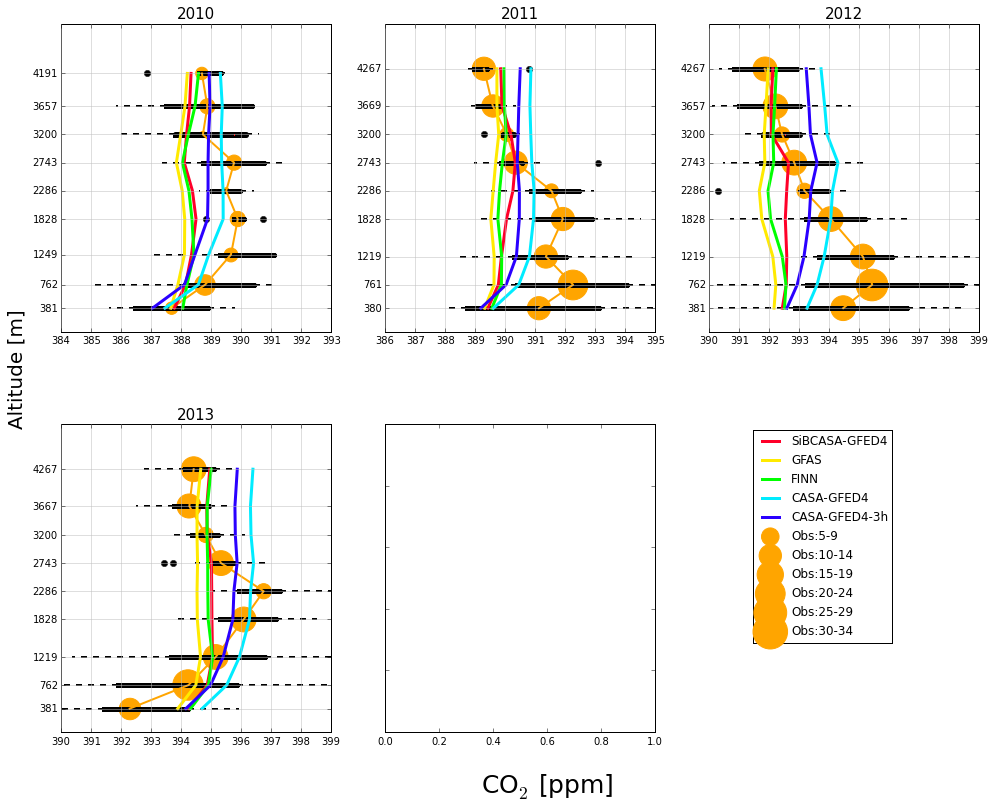

In [12]:
site    = 'san'
season  = 'fire'
minyear = 2010
maxyear = 2015
boxplot = True # False to plot errorbars

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO$_2$ [ppm]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
                
            for y in range(minyear,maxyear):
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
                
                index_4500_rmsd = np.where(alt<4500)
                
                #print ii, y, len(obs[index_4500_rmsd]), len(sim[index_4500_rmsd])
                
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                # activate to see the number of observations in each height per year
                #print y, obs_bin
                
                observations = []
                simulations = []
                error_low = []
                error_high = []
                obs_count = []
                altitude = []
                info_point2 = []
                
                for x in range(len(indices)):
                    simulations.append((sim[indices[x]]).mean())
                    observations.append((obs[indices[x]]).mean())
                    error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                    error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                    obs_count.append(len(obs[indices[x]]))   
                    altitude.append(alt[indices[x]].mean())
                    info_point2 += [[obs[indices[x]]]]
                    
                altitude = np.array([int(elem) for elem in altitude])
                observations = np.array(observations)
                    
                if y == 2010: 
                    ax1 = plt.subplot(231)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[0]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(384, 393) # Option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            #plt.xlim(386.5, 390.5) # Option 2 settings
                        ax1.legend(loc = 'upper left',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if y == 2011: 
                    ax1 = plt.subplot(232)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[1]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(386, 395) # option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #   median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(388, 394)
                        ax1.legend(loc = 'upper right', scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)    
                    #print y, rmse(simulations,observations)
                
                if y == 2012: 
                    ax1 = plt.subplot(233)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[2]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(390, 399) # option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(391, 397) # Option 2 settings
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if y == 2013: 
                    ax1 = plt.subplot(234)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[3]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(390, 399) # settings options 3
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(390, 398) # settings options 2
                        ax1.legend(loc = 'upper left',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                      
                if y == 2014: 
                    ax1 = plt.subplot(235)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[4]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(393, 402) # settings for option 3
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(394, 402) # settings for option 2
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                    #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                    ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
                
                if season == 'all': ax1.set_title('Santarem %i - All year'%y,fontsize=15)
                #if season == 'wet': ax1.set_title('Santarem %i - Wet Season'%y,fontsize=15)
                if season == 'wet': ax1.set_title('%i'%y,fontsize=15)
                #if season == 'fire': ax1.set_title('Santarem %i - Fire Season'%y,fontsize=15)
                if season == 'fire': ax1.set_title('%i'%y,fontsize=15)
                    
                ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                ax1.set_ylim(0,5000)
            t1 = [0]*9
            t2 = [0]*9
            ax1 = plt.subplot(236)
            ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
            ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
            ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
            ax1.spines['right'].set_color('none')
            ax1.spines['left'].set_color('none')
            ax1.spines['bottom'].set_color('none')
            ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('San_RMSE_all')
if season == 'wet': df_wet.to_pickle('San_RMSE_wet')
if season == 'fire': df_fire.to_pickle('San_RMSE_fire') 
            
indi, labels, x, y = legend_gen(site,season)

for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s = x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
#if season == 'wet': fig.savefig('Sim_san_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_san_Fire.png',bbox_inches='tight',DPI=1000)

# TABATINGA ALL YEAR, FIRE AND WET SEASON
 - Box whiskers can be plotted as well as errorbars 
 - RMSE can also be calculated for each year
 - The legend of each graph is special for this all year scenario
 - Option 1: observations alone with variability and other plot with only lines of simulations and observations
 - Option 2: Everything together with errorbars (25-75%)
 - Option 3: Everything together with boxplot, this options leaves some outliers outside due to the x-axis stretching to gain more detail

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc


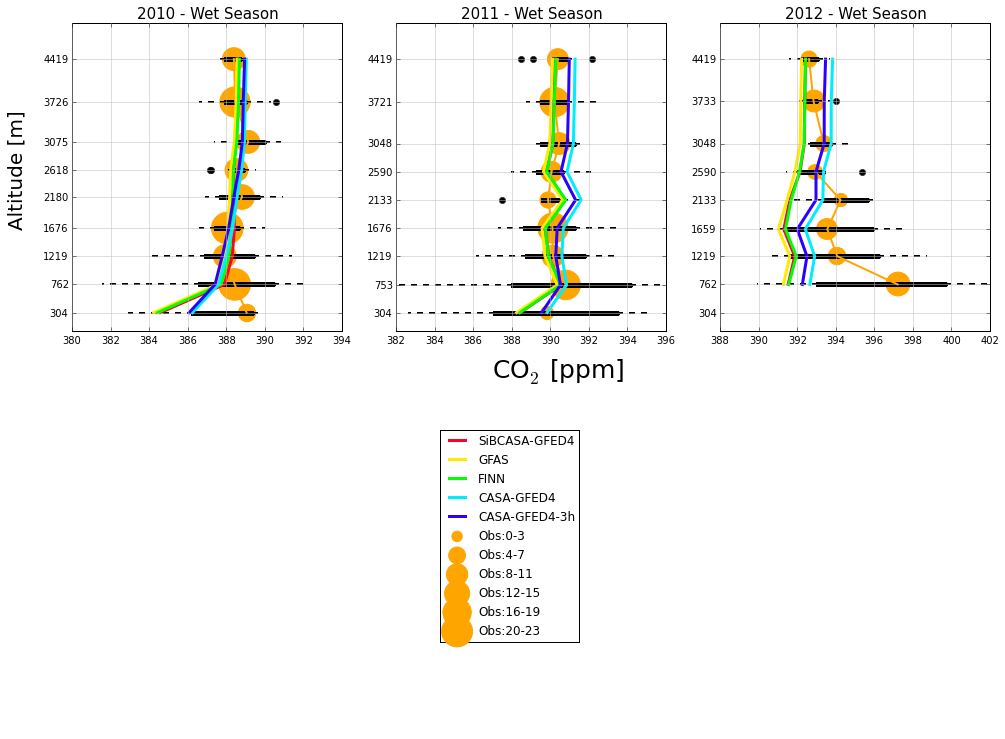

In [25]:
site    = 'tab'
season  = 'wet'
minyear = 2010
maxyear = 2013 # Observations only until 2012
boxplot = True # False to plot errorbars

fig,axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(-0.01, 0.73, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.49, 'CO$_2$ [ppm]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
                
            for y in range(minyear,maxyear):
                
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
        
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                #excluding outliers of July 31/ 2012
                if y == 2012: 
                    obs[index_500] = nan   #np.delete(obs,index_500)
                    sim[index_500] = nan
        
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                # activate to see the number of observations in each height per year
                #print y, obs_bin
                
                observations = []
                simulations = []
                error_low = []
                error_high = []
                obs_count = []
                altitude = []
                info_point2 = []
                
                for x in range(len(indices)):
                    simulations.append((sim[indices[x]]).mean())
                    observations.append((obs[indices[x]]).mean())
                    if obs_bin[x] !=0:
                        error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                        error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                    else:
                        error_low.insert(0,0)
                        error_high.insert(0,0)
                    obs_count.append(len(obs[indices[x]]))   
                    altitude.append(alt[indices[x]].mean())
                    info_point2 += [[obs[indices[x]]]]
                    
                if not season == 'fire': altitude = np.array([int(elem) for elem in altitude])
                if season == 'fire': altitude = np.array(altitude)
                observations = np.array(observations)
                    
                if y == 2010: 
                    ax1 = plt.subplot(231)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[0]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        if season == 'fire': plt.xlim(382, 396) # Option 3 settings
                        if season == 'wet': plt.xlim(380, 394)    
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(384, 391) # Option 2 settings
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if y == 2011: 
                    ax1 = plt.subplot(232)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[1]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        if season == 'fire': plt.xlim(380, 394)
                        if season == 'wet': plt.xlim(382, 396)    
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #   median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(383, 395)
                        ax1.legend(loc = 'upper left', scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if y == 2012: 
                    ax1 = plt.subplot(233)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[2]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        if season == 'fire': plt.xlim(386, 400)
                        if season == 'wet': plt.xlim(388, 402)    
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            if season == 'fire':
                                alt_temp = list(altitude)
                                del info_point2[0]
                                del alt_temp[0]
                                bp = ax1.boxplot(info_point2,positions=alt_temp,vert=False)
                            if not season == 'fire': bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(385, 417) # Option 2 settings
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                    #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                    ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
                
                if season == 'all': ax1.set_title('%i'%y,fontsize=15)
                if season == 'wet': ax1.set_title('%i - Wet Season'%y,fontsize=15)
                if season == 'fire': ax1.set_title('%i - Fire Season'%y,fontsize=15)
                
                ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                ax1.set_ylim(0,5000)
            t1 = [0]*9
            t2 = [0]*9
            ax1 = plt.subplot(235)
            ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
            ax1.legend(loc='upper left')
            ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
            ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
            ax1.spines['right'].set_color('none')
            ax1.spines['left'].set_color('none')
            ax1.spines['bottom'].set_color('none')
            ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('Tab_RMSE_all')
if season == 'wet': df_wet.to_pickle('Tab_RMSE_wet')
if season == 'fire': df_fire.to_pickle('Tab_RMSE_fire')            

indi, labels, x, y = legend_gen(site,season)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s=x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
#if season == 'wet': fig.savefig('Sim_tab_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_tab_Fire.png',bbox_inches='tight',DPI=1000)

# RIO BRANCO ALL YEAR, FIRE AND WET SEASON
 - Box whiskers can be plotted as well as errorbars 
 - RMSE can also be calculated for each year
 - The legend of each graph is special for this all year scenario
 - Option 1: observations alone with variability and other plot with only lines of simulations and observations
 - Option 2: Everything together with errorbars (25-75%)
 - Option 3: Everything together with boxplot, this options leaves some outliers outside due to the x-axis stretching to gain more detail

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc


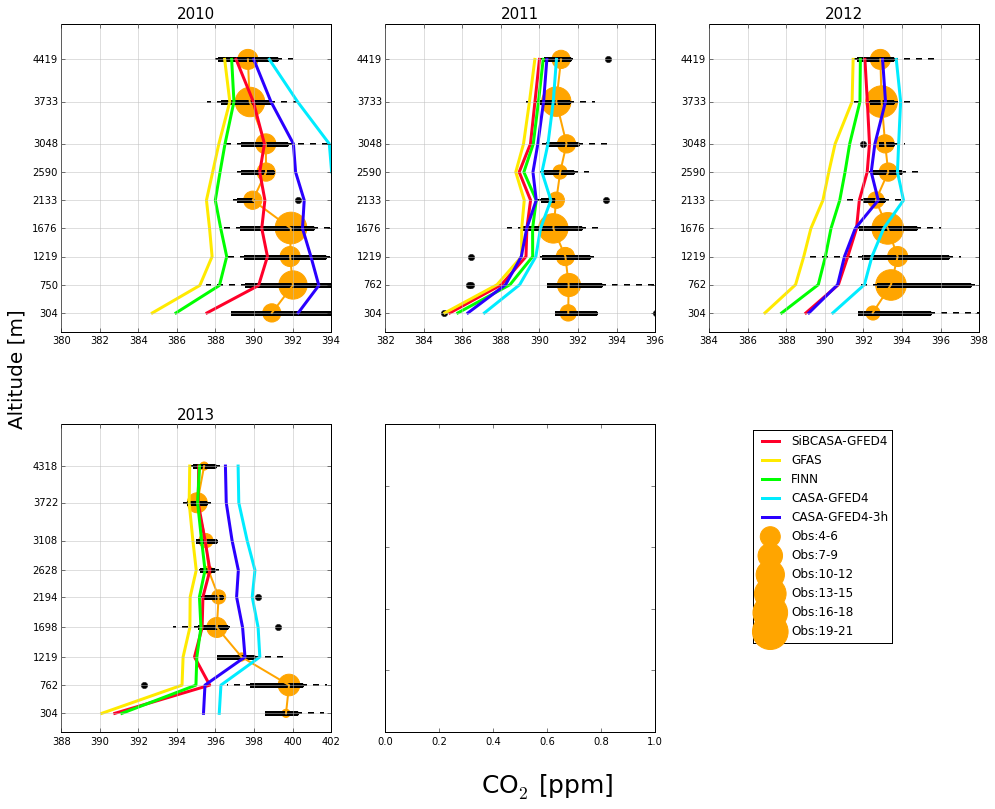

In [35]:
site    = 'rbo'
season  = 'fire'
minyear = 2010
maxyear = 2015
boxplot = True # False to plot errorbars

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO$_2$ [ppm]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
                
            for y in range(minyear,maxyear):
                
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
                
                index_4500_rmsd = np.where(alt<4500)
            
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                # activate to see the number of observations in each height per year
                #print y, obs_bin
                
                observations = []
                simulations = []
                error_low = []
                error_high = []
                obs_count = []
                altitude = []
                info_point2 = []
                
                for x in range(len(indices)):
                    simulations.append((sim[indices[x]]).mean())
                    observations.append((obs[indices[x]]).mean())
                    error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                    error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                    obs_count.append(len(obs[indices[x]]))   
                    altitude.append(alt[indices[x]].mean())
                    info_point2 += [[obs[indices[x]]]]
                    
                altitude = np.array([int(elem) for elem in altitude])
                observations = np.array(observations)
                
                   
                if y == 2010: 
                    ax1 = plt.subplot(231)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[0]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(380, 394) # Option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(382, 392) # Option 2 settings
                        ax1.legend(loc = 'upper left',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    #print y, rmse(simulations,observations)
                
                if y == 2011: 
                    ax1 = plt.subplot(232)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[1]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(382, 396) # option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #   median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(385, 393)
                        ax1.legend(loc = 'upper right', scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    #print y, rmse(simulations,observations)
                
                if y == 2012: 
                    ax1 = plt.subplot(233)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[2]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(384, 398) # option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(385, 397) # Option 2 settings
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    #print y, rmse(simulations,observations)
                
                if y == 2013: 
                    ax1 = plt.subplot(234)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[3]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(388, 402) # settings options 3
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(391, 399) # settings options 2
                        ax1.legend(loc = 'upper left',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    #print y, rmse(simulations,observations) 
                      
                if y == 2014: 
                    ax1 = plt.subplot(235)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[4]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(392, 406) # settings for option 3
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(394, 408) # settings for option 2
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim[index_4500_rmsd],obs[index_4500_rmsd])
                    #print y, rmse(simulations,observations)
                
                if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                    #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                    ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                    #ax1.legend(scatterpoints=1) # legend for observations option 1 
                ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
                
                if season == 'all': ax1.set_title('%i'%y,fontsize=15)
                if season == 'wet': ax1.set_title('%i'%y,fontsize=15)
                if season == 'fire': ax1.set_title('%i'%y,fontsize=15)
                
                ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                ax1.set_ylim(0,5000)
            t1 = [0]*9
            t2 = [0]*9
            ax1 = plt.subplot(236)
            ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
            ax1.legend(bbox_to_anchor=(0.7, 0.7))
            ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
            ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
            ax1.spines['right'].set_color('none')
            ax1.spines['left'].set_color('none')
            ax1.spines['bottom'].set_color('none')
            ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('Rbo_RMSE_all')
if season == 'wet': df_wet.to_pickle('Rbo_RMSE_wet')
if season == 'fire': df_fire.to_pickle('Rbo_RMSE_fire')

indi, labels, x, y = legend_gen(site,season)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s=x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
#if season == 'wet': fig.savefig('Sim_rbo_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_rbo_Fire.png',bbox_inches='tight',DPI=1000)'''

# ALTA FLORESTA ALL YEAR, FIRE AND WET SEASON 
 - Box whiskers can be plotted as well as errorbars 
 - RMSE can also be calculated for each year
 - The legend of each graph is special for this all year scenario
 - Option 1: observations alone with variability and other plot with only lines of simulations and observations
 - Option 2: Everything together with errorbars (25-75%)
 - Option 3: Everything together with boxplot, this options leaves some outliers outside due to the x-axis stretching to gain more detail
 # Note that for the year 2013 there are no observations in the first height interval, but in 2/12/2013 there was an observation done within that height. To plotted the d_index for fire needs to be adjusted to include that date.

co2_alf_aircraft-pfp_26_representative.nc
co2_alf_aircraft-pfp_26_representative.nc
co2_alf_aircraft-pfp_26_representative.nc
co2_alf_aircraft-pfp_26_representative.nc
co2_alf_aircraft-pfp_26_representative.nc
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


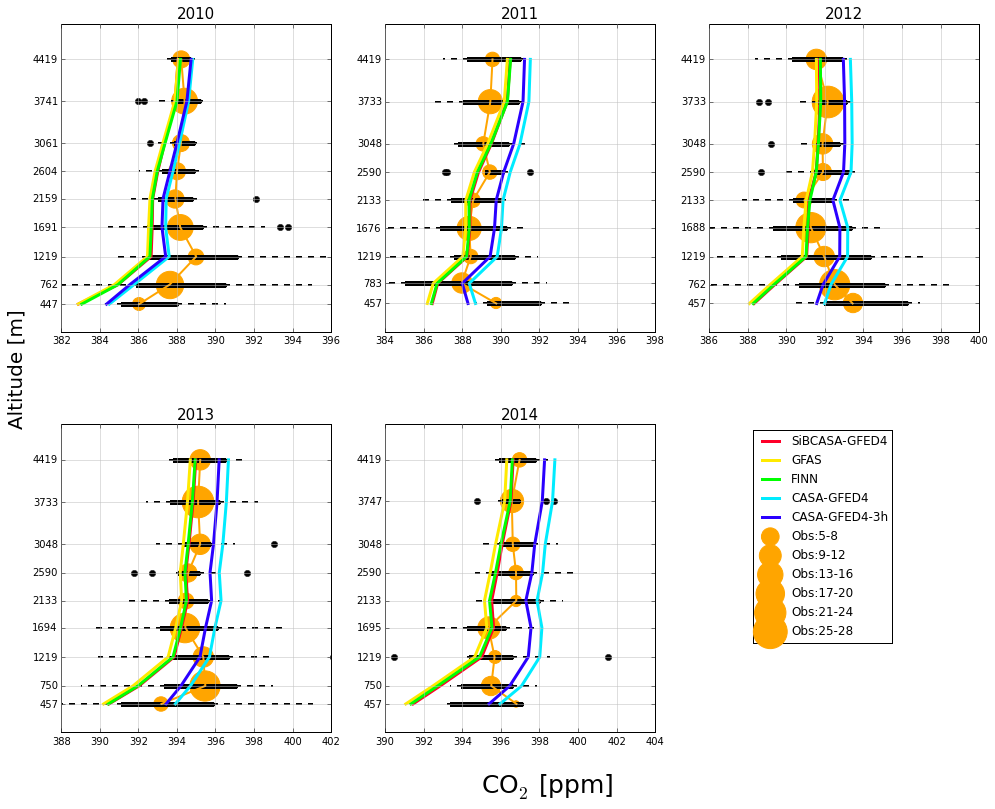

In [31]:
site    = 'alf'
season  = 'wet'

minyear = 2010
maxyear = 2015
boxplot = True # False to plot errorbars

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO$_2$ [ppm]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates   = np.array(dates)
        
            for y in range(minyear,maxyear):
                
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
        
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                
                # activate to see the number of observations in each height per year
                #print y, obs_bin
            
                observations = []
                simulations = []
                error_low = []
                error_high = []
                obs_count = []
                altitude = []
                info_point2 = []
                
                for x in range(len(indices)):
                    simulations.append((sim[indices[x]]).mean())
                    observations.append((obs[indices[x]]).mean())
                    if obs_bin[x] !=0:
                        error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                        error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                    else:
                        error_low.insert(0,0)
                        error_high.insert(0,0)
                    #error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                    #error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))    
                    obs_count.append(len(obs[indices[x]]))   
                    altitude.append(alt[indices[x]].mean())
                    #altitude.append(int(alt[indices[x]].mean()))
                    info_point2 += [[obs[indices[x]]]]
             
                if not season == 'fire': altitude = np.array([int(elem) for elem in altitude])
                #if season == 'fire': altitude = np.array(altitude)
                if season == 'fire': altitude = np.around(altitude,decimals=0)    
                #if season == 'fire' and y == 2013: 
                #    altitude = np.array([int(elem) for elem in altitude[1:]],float)
                #    altitude = np.insert(altitude,0,np.nan)
                
                observations = np.array(observations)
    
                if y == 2010: 
                    ax1 = plt.subplot(231)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[0]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(382, 396) # Option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(383, 396) # Option 2 settings
                        ax1.legend(loc = 'upper left',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    #print ii,y, rmse(simulations,observations)
                
                if y == 2011: 
                    ax1 = plt.subplot(232)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[1]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(384, 398) # option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #   median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(387, 393)
                        ax1.legend(loc = 'upper right', scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if y == 2012: 
                    ax1 = plt.subplot(233)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[2]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(386, 400) # option 3 settings
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(389, 396) # Option 2 settings
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if y == 2013: 
                    ax1 = plt.subplot(234)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[3]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(388, 402) # settings options 3                  
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            if season == 'fire':
                                alt_temp = list(altitude)
                                del info_point2[0]
                                del alt_temp[0]
                                bp = ax1.boxplot(info_point2,positions=alt_temp,vert=False)
                            #bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            if not season == 'fire': bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(390, 398) # settings options 2
                        ax1.legend(loc = 'upper left',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    #print y, rmse(simulations,observations) 
                      
                if y == 2014: 
                    ax1 = plt.subplot(235)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[4]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(390, 404) # settings for option 3
                        if boxplot:
                            #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                            for box in bp['boxes']:
                                box.set(color='black', linewidth=5)
                            for whisker in bp['whiskers']:
                                whisker.set(color='black', linewidth=2)
                            for cap in bp['caps']:
                                cap.set(color='black', linewidth=5)
                            #for median in bp['medians']:
                            #    median.set(color='black', linewidth=5)
                            for flier in bp['fliers']:
                                flier.set(marker='o', color='black', alpha=1)
                        else: 
                            ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                            plt.xlim(391, 399) # settings for option 2
                        ax1.legend(loc = 'upper right',scatterpoints = 1)
                    if season == 'all': df_all.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'wet': df_wet.loc[filas[ii],'%i'%(y)]   = rmse(sim,obs)
                    if season == 'fire': df_fire.loc[filas[ii],'%i'%(y)] = rmse(sim,obs)
                    #print y, rmse(simulations,observations)
                
                if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                    #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                    ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
                
                if season == 'all': ax1.set_title('%i'%y,fontsize=15)
                if season == 'wet': ax1.set_title('%i'%y,fontsize=15)
                if season == 'fire': ax1.set_title('%i'%y,fontsize=15)
            
                ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                ax1.set_ylim(0,5000)
            t1 = [0]*9
            t2 = [0]*9
            ax1 = plt.subplot(236)
            ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
            ax1.legend(bbox_to_anchor=(0.7, 0.7))
            ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
            ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
            ax1.spines['right'].set_color('none')
            ax1.spines['left'].set_color('none')
            ax1.spines['bottom'].set_color('none')
            ax1.spines['top'].set_color('none')

if season == 'all': df_all.to_pickle('Alf_RMSE_all')
if season == 'wet': df_wet.to_pickle('Alf_RMSE_wet')
if season == 'fire': df_fire.to_pickle('Alf_RMSE_fire')
    
indi, labels, x, y = legend_gen(site,season)
for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s=x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
#if season == 'wet': fig.savefig('Sim_alf_Wet.png',bbox_inches='tight',DPI=1000)
#if season == 'fire': fig.savefig('Sim_alf_Fire.png',bbox_inches='tight',DPI=1000)

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:SiBCASA-GFED4 RMSE =  1.19232
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:TAB:GFAS RMSE =  1.70236
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:FINN-GFED4 RMSE =  1.39561
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:CASA-GFED4 RMSE =  0.940608
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:CASA-GFED4-3h RMSE =  0.686763


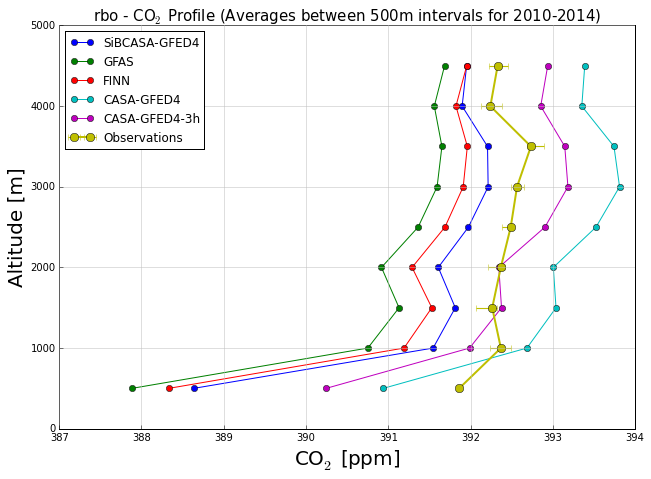

In [51]:
############################# Checking for 2010-2015 the RMSD and the profiles

site = 'rbo'

fig = plt.figure(1,figsize=(10,8))
ax1 = fig.add_axes([0.1,0.2,0.8,0.7])
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]
legend=['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h', 'Observations']

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            # indices to group per altitude 
            
            
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates   = np.array(dates)
            
            date_min = dt.datetime(2010,1,1)
            date_max = dt.datetime(2014,10,1)
            d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
            
            obs = o[d_index]
            sim = s.sum(axis=1)[d_index]
            alt = a[d_index]
            
            # indices to group per altitude 
            index_500 = np.where(alt<500)
            index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
            index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
            index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
            index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
            index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
            index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
            index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
            index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
            
            indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,index_3500,index_4000,index_4500]
            
            observations = []
            simulations = []
            error_low = []
            error_high = []
            
            for i in range(len(indices)):
                observations.append((obs[indices[i]]).mean())
                simulations.append((sim[indices[i]]).mean())
                error_low.append(np.median(observations) - np.percentile(observations,25.0))
                error_high.append(np.percentile(observations,75.0) - np.median(observations))
                #simulations.append((sim[indices[x]]).mean())
                #observations.append((obs[indices[x]]).mean())
            
            if ii == 0:
                print '%s:SiBCASA-GFED4 RMSE = '%(site), rmse(simulations,observations)
                
            if ii == 1:
                print '%s:TAB:GFAS RMSE = '%(site), rmse(simulations,observations)
            
            if ii == 2:
                print '%s:FINN-GFED4 RMSE = '%(site), rmse(simulations,observations)
            
            if ii == 3:
                print '%s:CASA-GFED4 RMSE = '%(site), rmse(simulations,observations)
                
            if ii == 4:
                print '%s:CASA-GFED4-3h RMSE = '%(site), rmse(simulations,observations)
                  
    
    ax1.plot(simulations,altitude,'-o',label=legend[ii])
    

ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),fmt='-o',label=legend[5],linewidth=2,markersize=8,elinewidth=1.1)
#ax1.errorbar(observations,altitude,'-',label=legend[5])
ax1.set_ylim(0,5000)
#ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
ax1.set_title('%s - CO$_2$ Profile (Averages between 500m intervals for 2010-2014)'%(site),fontsize=15)
ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax1.set_xlabel('CO$_2$ [ppm]',fontsize=20)
ax1.set_ylabel('Altitude [m]',fontsize=20)
ax1.legend(loc='upper left')

In [55]:
site = 'rbo'

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]
legend=['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h', 'Observations']

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
              
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates   = np.array(dates)

            date_min = dt.datetime(2010,1,1)
            date_max = dt.datetime(2014,10,1)
            d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

            obs = o[d_index]
            sim = s.sum(axis=1)[d_index]
            alt = a[d_index]
            index_4500 = np.where(alt<4500)
            
            observations = obs[index_4500]
            simulations = sim[index_4500]

            if ii == 0:
                print '%s:SiBCASA-GFED4 RMSE = '%(site), rmse(simulations,observations)

            if ii == 1:
                print '%s:TAB:GFAS RMSE = '%(site), rmse(simulations,observations)

            if ii == 2:
                print '%s:FINN-GFED4 RMSE = '%(site), rmse(simulations,observations)

            if ii == 3:
                print '%s:CASA-GFED4 RMSE = '%(site), rmse(simulations,observations)

            if ii == 4:
                print '%s:CASA-GFED4-3h RMSE = '%(site), rmse(simulations,observations)

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:SiBCASA-GFED4 RMSE =  3.1947
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:TAB:GFAS RMSE =  3.4757
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:FINN-GFED4 RMSE =  3.24716
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:CASA-GFED4 RMSE =  3.53007
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
rbo:CASA-GFED4-3h RMSE =  3.31656


In [23]:
dates = []
for i in time:
    dates.append(dt.datetime(*i))
dates = np.array(dates)
            
date_min = dt.datetime(2010,1,1)
date_max = dt.datetime(2014,5,28)
d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))

obs = o[d_index]
sim = s.sum(axis=1)[d_index]
alt = a[d_index]

In [24]:
print len(obs), len(sim)

1600 1600


In [21]:
print len(time), len(o), len(s)
time

3124 3124 3124


array([[2000,   12,    7,   16,   33,    0],
       [2000,   12,    7,   16,   38,    0],
       [2000,   12,    7,   16,   43,    0],
       ..., 
       [2014,    5,   27,   15,   28,    0],
       [2014,    5,   27,   15,   30,    0],
       [2014,    5,   27,   15,   31,    0]], dtype=int32)

In [11]:
len(o)
time

array([[2000,   12,    7,   16,   33,    0],
       [2000,   12,    7,   16,   38,    0],
       [2000,   12,    7,   16,   43,    0],
       ..., 
       [2014,    5,   27,   15,   28,    0],
       [2014,    5,   27,   15,   30,    0],
       [2014,    5,   27,   15,   31,    0]], dtype=int32)

0 /Storage/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_att_tower-insitu_45_allvalid-79magl-instrument1.nc
(23252,) (23252,) (23252, 7) (23252,)


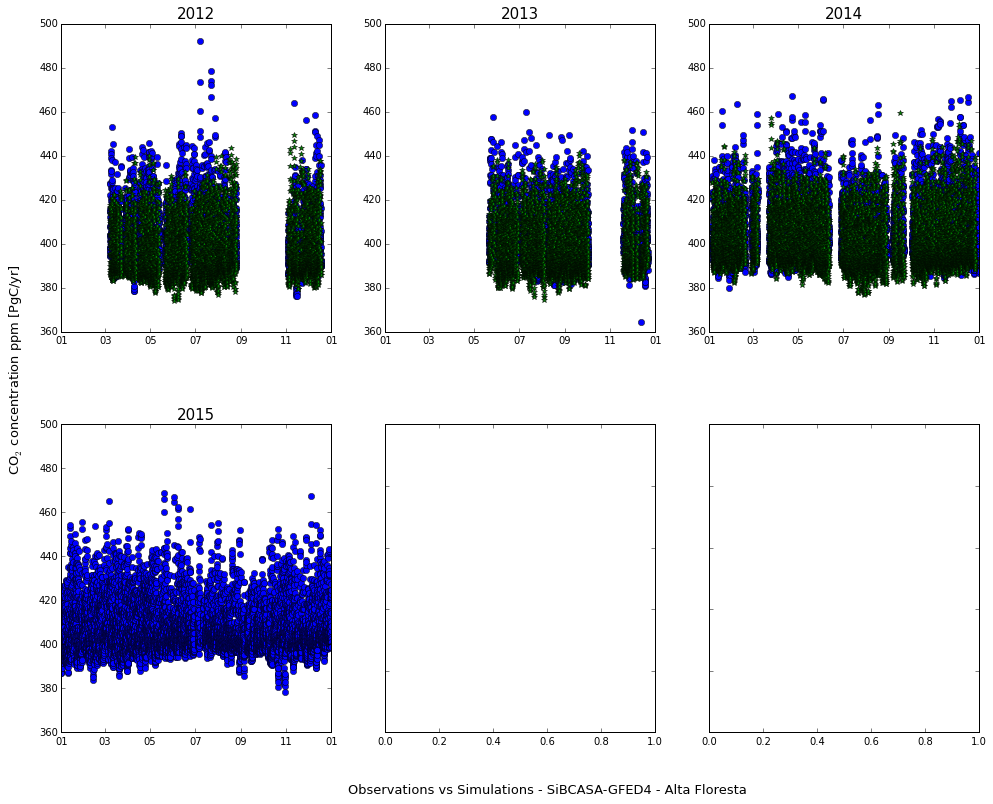

In [32]:
#################### ATTO Analysis at 79 meters with SiBCASA-GFED4

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009,'Observations vs Simulations - SiBCASA-GFED4 - ATTO Tower', ha='center',fontsize=13)
fig.text(0, 0.5, 'CO$_2$ concentration ppm [PgC/yr]', va='center', rotation='vertical',fontsize=13)

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        #print fname
        if fname == 'co2_att_tower-insitu_45_allvalid-79magl-instrument1.nc':
            print fname 
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            msm = f_site.variables['modelsamplesmean'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
    print shape(dates), shape(o), shape(s), shape(a)   
    
    ax1 = plt.subplot(231)
    ax1.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2012,1,1),dt.date(2013,1,1))
    ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax1.set_title('2012',fontsize=15)

    ax2 = plt.subplot(232)
    ax2.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2013,1,1),dt.date(2014,1,1))
    ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax2.set_title('2013',fontsize=15)

    ax3 = plt.subplot(233)
    ax3.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2014,1,1),dt.date(2015,1,1))
    ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax3.set_title('2014',fontsize=15)

    ax4 = plt.subplot(234)
    ax4.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2015,1,1),dt.date(2016,1,1))
    ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax4.set_title('2015',fontsize=15)
    
    

0 /Storage/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_att_tower-insitu_45_allvalid-809magl-instrument1.nc
(23252,) (23252,) (23252, 7) (23252,)


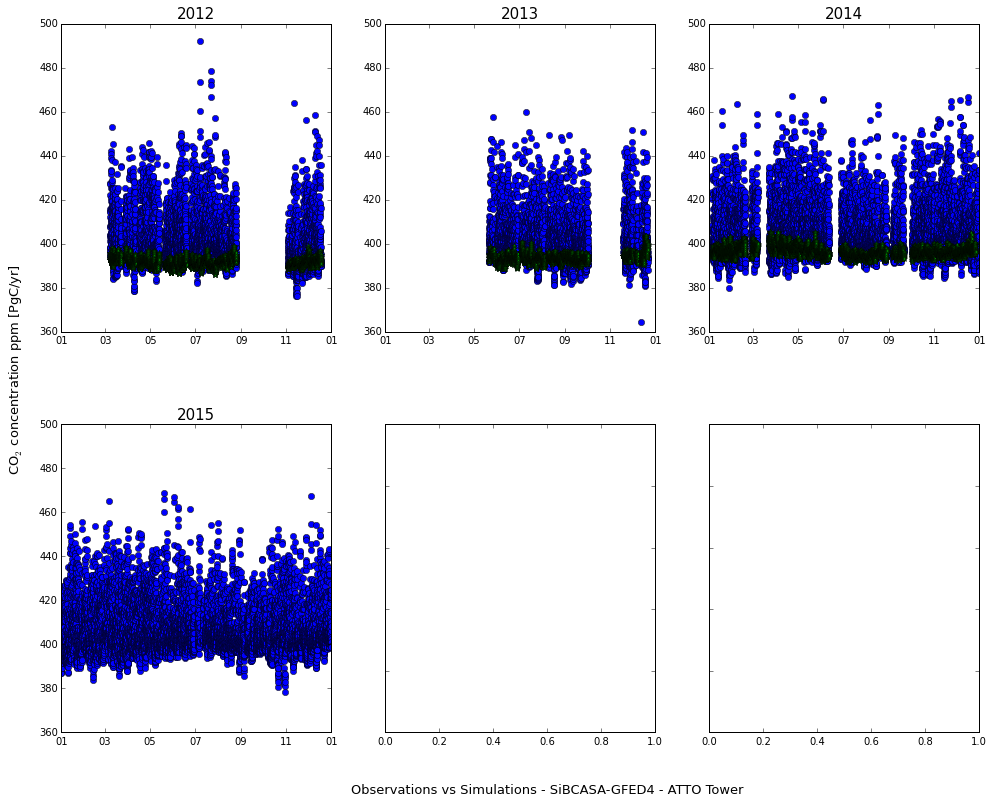

In [33]:
#################### ATTO Analysis at 679 meters with SiBCASA-GFED4

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009,'Observations vs Simulations - SiBCASA-GFED4 - ATTO Tower', ha='center',fontsize=13)
fig.text(0, 0.5, 'CO$_2$ concentration ppm [PgC/yr]', va='center', rotation='vertical',fontsize=13)

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        #print fname
        if fname == 'co2_att_tower-insitu_45_allvalid-809magl-instrument1.nc':
            print fname 
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            msm = f_site.variables['modelsamplesmean'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
    print shape(dates), shape(o), shape(s), shape(a)   
    
    ax1 = plt.subplot(231)
    ax1.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2012,1,1),dt.date(2013,1,1))
    ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax1.set_title('2012',fontsize=15)

    ax2 = plt.subplot(232)
    ax2.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2013,1,1),dt.date(2014,1,1))
    ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax2.set_title('2013',fontsize=15)

    ax3 = plt.subplot(233)
    ax3.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2014,1,1),dt.date(2015,1,1))
    ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax3.set_title('2014',fontsize=15)

    ax4 = plt.subplot(234)
    ax4.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2015,1,1),dt.date(2016,1,1))
    ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax4.set_title('2015',fontsize=15)
    
    

In [10]:
bio = f2.variables['bio_flux_opt'][:]
ff = f2.variables['fossil_flux_imp'][:]
fire = f2.variables['fire_flux_imp'][:]

print shape(bio), shape(ff), type(bio), type(ff)

(1, 180, 360) (1, 180, 360) <type 'numpy.ndarray'> <type 'numpy.ndarray'>


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


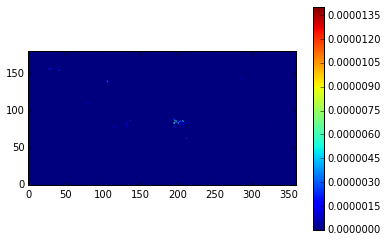

In [11]:
imshow(fire[0,:,:])
colorbar()
plt.gca().invert_yaxis()

In [12]:
f = cdf.Dataset('/Storage/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_amazon_yearly/amazon_fluxes.2010.nc')


In [13]:
value = f.variables['fire_flux_imp'][:]*12/1e15*365*86400
value

array([[ 0.53683061]])

# Building the graph step by step

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]


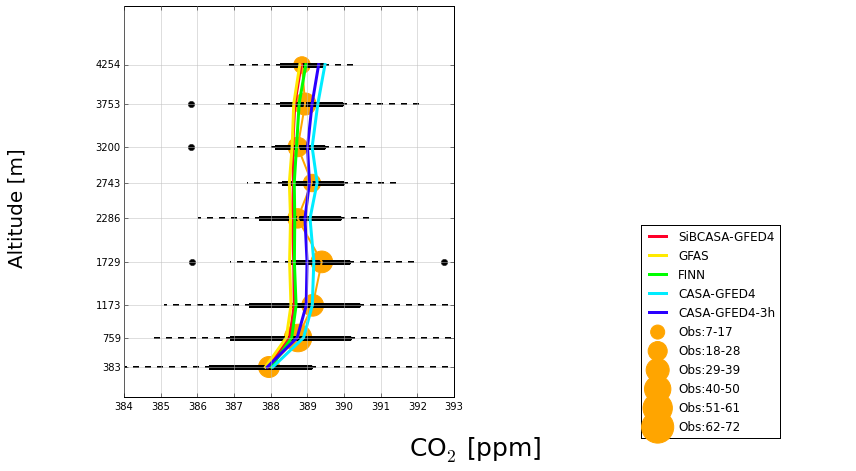

In [43]:
site    = 'san'
season  = 'all'
minyear = 2010
maxyear = 2011
boxplot = False # False to plot errorbars

fig,axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(13,7))
#fig,axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(15,12))
#subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'CO$_2$ [ppm]', ha='center',fontsize=25)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h','Observations']

filas   = pd.Series(['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h'])
df_all  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_fire = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))
df_wet  = pd.DataFrame(np.zeros((5,5)),index=filas, columns=('2010','2011','2012','2013','2014'))

if season == 'fire': maxyear = 2014
for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
                
            for y in range(minyear,maxyear):
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
        
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                # activate to see the number of observations in each height per year
                #print y, obs_bin
                
                observations = []
                simulations = []
                error_low = []
                error_high = []
                obs_count = []
                altitude = []
                info_point2 = []
                
                for x in range(len(indices)):
                    simulations.append((sim[indices[x]]).mean())
                    observations.append((obs[indices[x]]).mean())
                    error_low.append(np.median(obs[indices[x]]) - np.percentile(obs[indices[x]],25.0))
                    error_high.append(np.percentile(obs[indices[x]],75.0) - np.median(obs[indices[x]]))
                    obs_count.append(len(obs[indices[x]]))   
                    altitude.append(alt[indices[x]].mean())
                    info_point2 += [[obs[indices[x]]]]
                    
                altitude = np.array([int(elem) for elem in altitude])
                observations = np.array(observations)
                    
                if y == 2010: 
                    ax1 = plt.subplot(121)
                    #ax1 = plt.subplot(111)
                    sizes_arr = sizes_gen(site,season)[0]
                    ss = np.array([10*n for n in sizes_arr[0]])
                    if ii == 0:
                        for k,j in enumerate(sorted(set(ss))):
                            index = np.where(ss == j)            
                            ax1.scatter(observations[index], altitude[index], s=ss[index], color='orange')
                        plt.xlim(384, 393) # Option 3 settings
                        bp = ax1.boxplot(info_point2,positions=altitude,vert=False)
                        for box in bp['boxes']:
                            box.set(color='black', linewidth=5)
                        for whisker in bp['whiskers']:
                            whisker.set(color='black', linewidth=2)
                        for cap in bp['caps']:
                            cap.set(color='black', linewidth=5)
                        #for median in bp['medians']:
                        #    median.set(color='black', linewidth=5)
                        for flier in bp['fliers']:
                            flier.set(marker='o', color='black', alpha=1)
                        ax1.legend(loc = 'upper left',scatterpoints = 1)        
                
                if ii == 0: # this is to plot the errorbar just once to get it in the general legend
                    #ax1.errorbar(observations, altitude, xerr=np.vstack([error_low,error_high]),color='orange',label=legend[5],linewidth=2,elinewidth=1.1)
                    ax1.plot(observations, altitude,color='orange',label=legend[5],linewidth=2) # to plot obs for option 1
                ax1.plot(simulations,altitude,'-',linewidth=3,color=colors[ii],label=legend[ii])
                    
                ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                ax1.set_ylim(0,5000)
            
            t1 = [0]*9
            t2 = [0]*9
            ax1 = plt.subplot(236)
            ax1.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
            ax1.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
            ax1.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
            ax1.spines['right'].set_color('none')
            ax1.spines['left'].set_color('none')
            ax1.spines['bottom'].set_color('none')
            ax1.spines['top'].set_color('none')
            
indi, labels, x, y = legend_gen(site,season)

for g,inn in enumerate(indi):
    ax1.scatter(x*0, y*0, s = x[inn], color='orange', label = labels[g])
    ax1.legend(scatterpoints = 1,bbox_to_anchor=(0.7, 1))
fig.savefig('OBS1.png',bbox_inches='tight',DPI=1000)